In [ ]:
import pandas as pd
import seaborn as sns


In [71]:
df = pd.read_csv("data-8013-trends.csv")

In [73]:
df['BILLING_DATE'] = pd.to_datetime(df['BILLING_DATE'])

df.to_csv( "data-8013-trends.csv")

In [75]:
import pandas as pd
from io import StringIO

# Load your data (assuming it's in CSV format)

# Sort by BILLING_DATE
df_sorted = df.sort_values(by='BILLING_DATE')


In [76]:
df_sorted.head(1000)

,BILLING_DATE,SITE,BRAND,FORMAT_DESC,MH_SEGMENT,MH_FAMILY,MH_CLASS,MH_BRICK,ARTICLE,TOTAL_BILLING_QTY,TOTAL_GROSS_MARGIN,TOTAL_MARKDOWN,TOTAL_NET_SALES,TOTAL_GROSS_SALES,TOTAL_DISCOUNT
712337,2022-09-30,8013,04017,TRENDS,WOMENS WEAR,WESTERN WEAR,WINTER WEAR,SWEATSHIRTS,441146771010,1,78.66,0.0,334.28,499.0,164.72
669408,2022-09-30,8013,D525,TRENDS,WOMENS WEAR,WESTERN WEAR,CASUAL WEAR,T SHIRTS,441137882004,1,71.91,0.0,240.26,399.0,158.74
236195,2022-09-30,8013,09888,TRENDS,MENS CASUAL,ACTIVE WEAR,TOPS,T SHIRTS,441134761003,1,88.72,0.0,322.58,599.0,276.42
298014,2022-09-30,8013,04063,TRENDS,MENS CASUAL,ACTIVE WEAR,TOPS,T SHIRTS,441145712004,1,408.46,0.0,799.00,799.0,0.00
776725,2022-09-30,8013,04042,TRENDS,MENS WEAR,SMART CASUALS,BOTTOMS,TROUSERS,441138083006,1,239.82,0.0,790.98,999.0,208.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520636,2022-10-01,8013,D699,TRENDS,WOMENS WEAR,ETHNIC WEAR,TOPWEAR,Dresses,441145768001,1,693.86,0.0,1411.60,1799.0,387.40
630444,2022-10-01,8013,F835,TRENDS,KIDS WEAR,YOUTH GIRLS,DRESSES,WOVEN DRESS,441146908002,1,275.93,0.0,650.74,799.0,148.26
215608,2022-10-01,8013,F138,TRENDS,KIDS WEAR,YOUTH BOYS,TOP WEAR,T SHIRTS,441142448004,1,477.46,0.0,799.00,799.0,0.00
119350,2022-10-01,8013,F133,TRENDS,KIDS WEAR,KIDS BOYS,TOP WEAR,SHIRTS,441140906006,1,179.70,0.0,539.92,699.0,159.08


In [82]:
# Check the actual data type of BRAND column
print(f"BRAND column dtype: {df_sorted['BRAND'].dtype}")
print(f"Is BRAND categorical?: {isinstance(df_sorted['BRAND'].dtype, pd.CategoricalDtype)}")
print(f"BRAND column info:")
print(df_sorted['BRAND'].dtype)


BRAND column dtype: object
Is BRAND categorical?: False
BRAND column info:
object


In [83]:
# Check current state
print("Before fixing:")
print(f"BRAND dtype: {df_sorted['BRAND'].dtype}")
print(f"Null values in BRAND: {df_sorted['BRAND'].isnull().sum()}")

# Simply fill null values (no need for categorical handling)
df_sorted['BRAND'] = df_sorted['BRAND'].fillna('UNKNOWN_BRAND')

# Verify the fix
print("\nAfter fixing:")
print(f"BRAND dtype: {df_sorted['BRAND'].dtype}")
print(f"Null values in BRAND: {df_sorted['BRAND'].isnull().sum()}")
print(f"Rows with 'UNKNOWN_BRAND': {(df_sorted['BRAND'] == 'UNKNOWN_BRAND').sum()}")


Before fixing:
BRAND dtype: object
Null values in BRAND: 289

After fixing:
BRAND dtype: object
Null values in BRAND: 0
Rows with 'UNKNOWN_BRAND': 289


In [85]:
# Now create PRODUCT_KEY with all null values handled
df_sorted['PRODUCT_KEY'] = (
    df_sorted['BRAND'].astype(str) + " | " + 
    df_sorted['MH_SEGMENT'].astype(str) + " | " + 
    df_sorted['MH_FAMILY'].astype(str) + " | " + 
    df_sorted['MH_CLASS'].astype(str) + " | " + 
    df_sorted['MH_BRICK'].astype(str)
)

# Final verification
print(f"\nPRODUCT_KEY creation results:")
print(f"Total rows: {len(df_sorted):,}")
print(f"Unique PRODUCT_KEYs: {df_sorted['PRODUCT_KEY'].nunique():,}")
print(f"Null PRODUCT_KEYs: {df_sorted['PRODUCT_KEY'].isnull().sum()}")

# Show sample PRODUCT_KEYs with UNKNOWN_BRAND
unknown_brand_samples = df_sorted[df_sorted['BRAND'] == 'UNKNOWN_BRAND']['PRODUCT_KEY'].head(3)
if len(unknown_brand_samples) > 0:
    print(f"\nSample PRODUCT_KEYs with UNKNOWN_BRAND:")
    for i, key in enumerate(unknown_brand_samples, 1):
        print(f"{i}. {key}")



PRODUCT_KEY creation results:
Total rows: 823,225
Unique PRODUCT_KEYs: 1,883
Null PRODUCT_KEYs: 0

Sample PRODUCT_KEYs with UNKNOWN_BRAND:
1. UNKNOWN_BRAND | CONCESSIONAIRE SERVICES | GOODS TRANSPORT AGENCY SERVICES | GOODS TRANSPORT AGENCY SERVICES | GOODS TRNS SERVICES
2. UNKNOWN_BRAND | CONCESSIONAIRE SERVICES | GOODS TRANSPORT AGENCY SERVICES | GOODS TRANSPORT AGENCY SERVICES | GOODS TRNS SERVICES
3. UNKNOWN_BRAND | CONCESSIONAIRE SERVICES | GOODS TRANSPORT AGENCY SERVICES | GOODS TRANSPORT AGENCY SERVICES | GOODS TRNS SERVICES


In [79]:
# Step 1: Handle the categorical column
print("Before fixing:")
print(f"BRAND dtype: {df_sorted['BRAND'].dtype}")
print(f"Null values: {df_sorted['BRAND'].isnull().sum()}")

# Step 2: Add new category and fill nulls
df_sorted['BRAND'] = df_sorted['BRAND'].cat.add_categories(['UNKNOWN_BRAND'])
df_sorted['BRAND'] = df_sorted['BRAND'].fillna('UNKNOWN_BRAND')

# Step 3: Verify the fix
print("\nAfter fixing:")
print(f"BRAND dtype: {df_sorted['BRAND'].dtype}")
print(f"Null values: {df_sorted['BRAND'].isnull().sum()}")
print(f"Number of 'UNKNOWN_BRAND' entries: {(df_sorted['BRAND'] == 'UNKNOWN_BRAND').sum()}")

# Step 4: Now safely create PRODUCT_KEY
df_sorted['PRODUCT_KEY'] = (
    df_sorted['BRAND'].astype(str) + " | " + 
    df_sorted['MH_SEGMENT'].astype(str) + " | " + 
    df_sorted['MH_FAMILY'].astype(str) + " | " + 
    df_sorted['MH_CLASS'].astype(str) + " | " + 
    df_sorted['MH_BRICK'].astype(str)
)

# Step 5: Final verification
print(f"\nPRODUCT_KEY creation successful!")
print(f"Total rows: {len(df_sorted):,}")
print(f"Unique PRODUCT_KEYs: {df_sorted['PRODUCT_KEY'].nunique():,}")
print(f"Null PRODUCT_KEYs: {df_sorted['PRODUCT_KEY'].isnull().sum()}")


Before fixing:
BRAND dtype: object
Null values: 289


AttributeError: Can only use .cat accessor with a 'category' dtype

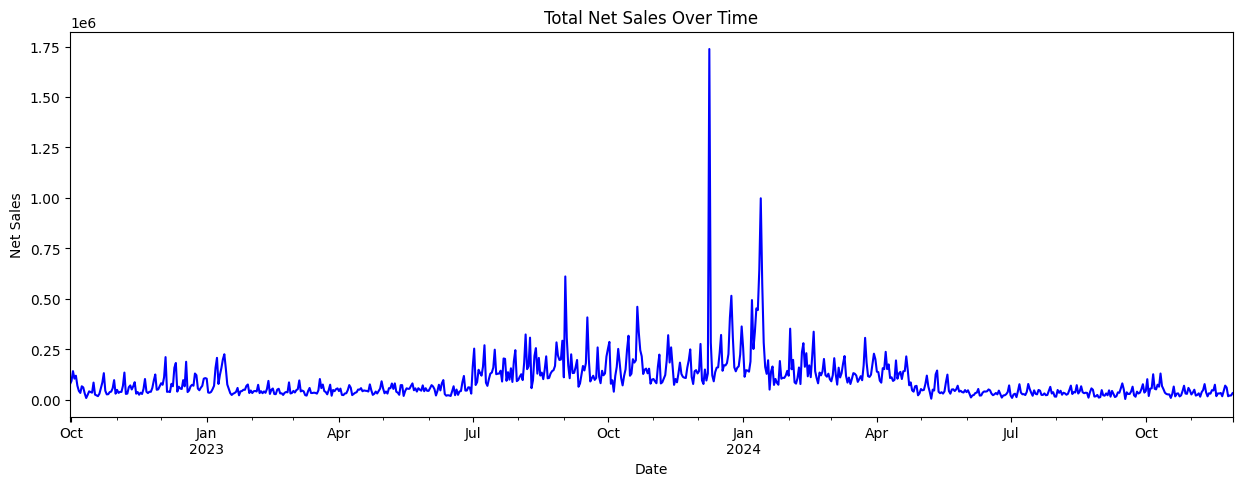

In [34]:
df['BILLING_DATE'] = pd.to_datetime(df['BILLING_DATE'])
df.sort_values('BILLING_DATE', inplace=True)

df.groupby('BILLING_DATE')['TOTAL_NET_SALES'].sum().plot(
    figsize=(15, 5),
    title="Total Net Sales Over Time",
    color="blue"
)
plt.ylabel("Net Sales")
plt.xlabel("Date")
plt.show()


In [58]:
# Aggregate by date and product key
product_sales = df_sorted.groupby(['BILLING_DATE', 'PRODUCT_KEY']).agg({
    'TOTAL_NET_SALES': 'sum',
    'TOTAL_BILLING_QTY': 'sum',
    'TOTAL_GROSS_MARGIN': 'sum'
}).reset_index()

# Create pivot table for easier time series analysis
sales_pivot = product_sales.pivot_table(
    index='BILLING_DATE', 
    columns='PRODUCT_KEY', 
    values='TOTAL_NET_SALES', 
    fill_value=0
)


In [61]:
product_sales.head(100)


,BILLING_DATE,PRODUCT_KEY,TOTAL_NET_SALES,TOTAL_BILLING_QTY,TOTAL_GROSS_MARGIN
0,2022-09-30,04017 | FW ACCESSORIES | FW AC APP | MENS | BELTS,699.00,1,365.61
1,2022-09-30,04042 | MENS CASUAL | INNER WEAR | BOTTOMS | B...,449.00,1,220.12
2,2022-09-30,04042 | MENS CASUAL | INNER WEAR | TOPS | VESTS,269.00,1,111.35
3,2022-09-30,04063 | MENS CASUAL | WINTER WEAR | TOPS | SWE...,2998.00,2,1584.80
4,2022-09-30,05016 | MENS FOOTWEAR | FW MN FORMAL | MENS | ...,1508.24,1,719.46
...,...,...,...,...,...
95,2022-10-01,J874 | MENS CASUAL | WINTER WEAR | TOPS | SWEA...,1619.82,1,849.76
96,2022-10-02,04042 | MENS CASUAL | INNER WEAR | BOTTOMS | B...,327.02,1,111.94
97,2022-10-02,04042 | MENS CASUAL | INNER WEAR | BOTTOMS | B...,2851.70,7,1563.75
98,2022-10-02,04042 | MENS CASUAL | INNER WEAR | BOTTOMS | B...,819.10,2,365.10


In [62]:
sales_pivot.head()

PRODUCT_KEY,02156 | PERSONAL CARE | P'SONAL HYGN | GENRL P'SONAL HYGN | ANTIPERSPIRANTS/DEOD,02338 | WATCHES | WRIST WATCHES | BASIC | KIDS,02370 | D2C Fashion | Men | Footwear | Flip Flop & Slippers,02370 | D2C Fashion | Men | Footwear | Sandals,02370 | D2C Fashion | Men | Footwear | Sports Shoes,02370 | FW ACCESSORIES | FW AC APP | MENS | SOCKS,02378 | HOME APPLIANCES | SMALL DOMESTIC APPL | KITCHEN CARE | RICE COOKER,02556 | COSMETICS | COLOUR | EYE MAKE-UP | EYE DEFINER (PENCIL),02556 | COSMETICS | COLOUR | EYE MAKE-UP | EYE LASH THICKENER,02556 | COSMETICS | COLOUR | EYE MAKE-UP | EYE LINER,...,U244 | MENS CASUAL | DENIM WEAR | TOPWEAR | SHIRTS,U244 | MENS CASUAL | DENIM WEAR | TOPWEAR | T SHIRTS,W218 | WOMENS WEAR | FUSION ETHNIC WEAR | BOTTOMWEAR | SKIRTS,W218 | WOMENS WEAR | FUSION ETHNIC WEAR | TOPWEAR | DRESSES,W218 | WOMENS WEAR | FUSION ETHNIC WEAR | TOPWEAR | TOPS,W218 | WOMENS WEAR | OCCASION ETHNIC WEAR | BOTTOM WEAR | BOTTOMS,W218 | WOMENS WEAR | OCCASION ETHNIC WEAR | TOPWEAR | DRESSES,Z072 | FURNISHINGS & DECOR | FURNISHINGS | BEDDING | BED IN A BAG,Z072 | FURNISHINGS & DECOR | FURNISHINGS | BEDDING | Bedsheet Set,Z072 | FURNISHINGS & DECOR | FURNISHINGS | BEDDING | PRINTED BEDSHEET
BILLING_DATE,,,,,,,,,,,,,,,,,,,,,
2022-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# Process data in chunks to manage memory
def process_data_efficiently(df_sorted):
    # Use efficient data types
    df_sorted['BILLING_DATE'] = pd.to_datetime(df_sorted['BILLING_DATE'])
    df_sorted['TOTAL_NET_SALES'] = pd.to_numeric(df_sorted['TOTAL_NET_SALES'], downcast='float')
    df_sorted['TOTAL_BILLING_QTY'] = pd.to_numeric(df_sorted['TOTAL_BILLING_QTY'], downcast='integer')
    
    return df_sorted

# Use categorical data types for repeated values
df_sorted['PRODUCT_KEY'] = df_sorted['PRODUCT_KEY'].astype('category')
df_sorted['BRAND'] = df_sorted['BRAND'].astype('category')


In [65]:
df_sorted.head()

,Unnamed: 0,BILLING_DATE,SITE,BRAND,FORMAT_DESC,MH_SEGMENT,MH_FAMILY,MH_CLASS,MH_BRICK,ARTICLE,TOTAL_BILLING_QTY,TOTAL_GROSS_MARGIN,TOTAL_MARKDOWN,TOTAL_NET_SALES,TOTAL_GROSS_SALES,TOTAL_DISCOUNT,PRODUCT_KEY
59242,59242,2022-09-30,8013,G143,TRENDS,KIDS WEAR,BOYS,WINTER WEAR,SWEATSHIRTS,441338575003,1,421.86,0.0,754.28,899.0,144.72,G143 | KIDS WEAR | BOYS | WINTER WEAR | SWEATS...
96360,96360,2022-09-30,8013,F133,TRENDS,KIDS WEAR,KIDS BOYS,TOP WEAR,T SHIRTS,441137851003,1,73.03,0.0,193.48,249.0,55.52,F133 | KIDS WEAR | KIDS BOYS | TOP WEAR | T SH...
49354,49354,2022-09-30,8013,D526,TRENDS,WOMENS WEAR,SLEEP WEAR,PJ SEPARATES,PYJAMA,441146286035,1,219.17,0.0,520.24,649.0,128.76,D526 | WOMENS WEAR | SLEEP WEAR | PJ SEPARATES...
94731,94731,2022-09-30,8013,F133,TRENDS,KIDS WEAR,KIDS BOYS,TOPS,SHIRTS,441140923003,1,229.13,0.0,485.77,599.0,113.23,F133 | KIDS WEAR | KIDS BOYS | TOPS | SHIRTS
56924,56924,2022-09-30,8013,G143,TRENDS,KIDS WEAR,BOYS,BOTTOMS,JEANS,441295038004,1,341.78,0.0,850.80,1049.0,198.20,G143 | KIDS WEAR | BOYS | BOTTOMS | JEANS


In [69]:
# Check the current data type
print(f"BRAND column type: {df_sorted['BRAND'].dtype}")
print(f"BRAND categories: {df_sorted['BRAND'].cat.categories[:10]}...")  # Show first 10

# Add 'NO_BRAND' to the categories first
df_sorted['BRAND'] = df_sorted['BRAND'].cat.add_categories(['NO_BRAND'])

# Now fill the null values
df_sorted['BRAND'] = df_sorted['BRAND'].fillna('NO_BRAND')

print(f"Null values after filling: {df_sorted['BRAND'].isnull().sum()}")


BRAND column type: category
BRAND categories: Index(['02156', '02338', '02370', '02378', '02556', '02558', '02883', '03023',
       '03054', '03500'],
      dtype='object')...
Null values after filling: 0


In [70]:
# Step 1: Handle the categorical column
print("Before fixing:")
print(f"BRAND dtype: {df_sorted['BRAND'].dtype}")
print(f"Null values: {df_sorted['BRAND'].isnull().sum()}")

# Step 2: Add new category and fill nulls
df_sorted['BRAND'] = df_sorted['BRAND'].cat.add_categories(['UNKNOWN_BRAND'])
df_sorted['BRAND'] = df_sorted['BRAND'].fillna('UNKNOWN_BRAND')

# Step 3: Verify the fix
print("\nAfter fixing:")
print(f"BRAND dtype: {df_sorted['BRAND'].dtype}")
print(f"Null values: {df_sorted['BRAND'].isnull().sum()}")
print(f"Number of 'UNKNOWN_BRAND' entries: {(df_sorted['BRAND'] == 'UNKNOWN_BRAND').sum()}")

# Step 4: Now safely create PRODUCT_KEY
df_sorted['PRODUCT_KEY'] = (
    df_sorted['BRAND'].astype(str) + " | " + 
    df_sorted['MH_SEGMENT'].astype(str) + " | " + 
    df_sorted['MH_FAMILY'].astype(str) + " | " + 
    df_sorted['MH_CLASS'].astype(str) + " | " + 
    df_sorted['MH_BRICK'].astype(str)
)

# Step 5: Final verification
print(f"\nPRODUCT_KEY creation successful!")
print(f"Total rows: {len(df_sorted):,}")
print(f"Unique PRODUCT_KEYs: {df_sorted['PRODUCT_KEY'].nunique():,}")
print(f"Null PRODUCT_KEYs: {df_sorted['PRODUCT_KEY'].isnull().sum()}")


Before fixing:
BRAND dtype: category
Null values: 0

After fixing:
BRAND dtype: category
Null values: 0
Number of 'UNKNOWN_BRAND' entries: 0

PRODUCT_KEY creation successful!
Total rows: 100,000
Unique PRODUCT_KEYs: 986
Null PRODUCT_KEYs: 0


In [93]:
!pip install statsmodels scikit-learn

  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 7.6 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]


In [94]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def preprocess_data(df):
    """
    Complete preprocessing pipeline for retail sales data
    """
    print("Starting data preprocessing...")
    print(f"Initial dataset size: {len(df):,} rows")
    
    # Handle null values in BRAND column
    print(f"Null values in BRAND: {df['BRAND'].isnull().sum()}")
    
    # Check if BRAND is categorical and handle accordingly
    if pd.api.types.is_categorical_dtype(df['BRAND']):
        df['BRAND'] = df['BRAND'].cat.add_categories(['UNKNOWN_BRAND'])
    df['BRAND'] = df['BRAND'].fillna('UNKNOWN_BRAND')
    
    # Handle any other null values in product key columns
    product_key_columns = ['BRAND', 'MH_SEGMENT', 'MH_FAMILY', 'MH_CLASS', 'MH_BRICK']
    for col in product_key_columns:
        null_count = df[col].isnull().sum()
        if null_count > 0:
            print(f"Filling {null_count} null values in {col}")
            df[col] = df[col].fillna('UNKNOWN')
    
    # Create PRODUCT_KEY
    df['PRODUCT_KEY'] = (
        df['BRAND'].astype(str) + ' | ' + 
        df['MH_SEGMENT'].astype(str) + ' | ' + 
        df['MH_FAMILY'].astype(str) + ' | ' + 
        df['MH_CLASS'].astype(str) + ' | ' + 
        df['MH_BRICK'].astype(str)
    )
    
    # Convert BILLING_DATE to datetime
    df['BILLING_DATE'] = pd.to_datetime(df['BILLING_DATE'])
    
    # Optimize data types for memory efficiency
    df['TOTAL_NET_SALES'] = pd.to_numeric(df['TOTAL_NET_SALES'], downcast='float')
    df['TOTAL_BILLING_QTY'] = pd.to_numeric(df['TOTAL_BILLING_QTY'], downcast='integer')
    df['TOTAL_GROSS_MARGIN'] = pd.to_numeric(df['TOTAL_GROSS_MARGIN'], downcast='float')
    
    print(f"Final dataset size: {len(df):,} rows")
    print(f"Unique PRODUCT_KEYs created: {df['PRODUCT_KEY'].nunique():,}")
    print(f"Date range: {df['BILLING_DATE'].min()} to {df['BILLING_DATE'].max()}")
    
    return df

def select_viable_products(df, min_transactions=30, min_days=20, top_n=50):
    """
    Select products with sufficient data for reliable forecasting
    """
    print("\nAnalyzing product viability for ARIMA forecasting...")
    
    # Analyze each product's transaction patterns
    product_stats = df.groupby('PRODUCT_KEY').agg({
        'BILLING_DATE': 'nunique',  # Number of unique days with sales
        'TOTAL_NET_SALES': ['count', 'sum', 'mean'],  # Transaction count, total, average
        'TOTAL_BILLING_QTY': 'sum'
    }).round(2)
    
    # Flatten column names
    product_stats.columns = ['unique_days', 'transaction_count', 'total_sales', 'avg_sales', 'total_qty']
    
    # Filter viable products based on criteria
    viable_products = product_stats[
        (product_stats['transaction_count'] >= min_transactions) & 
        (product_stats['unique_days'] >= min_days)
    ].sort_values('total_sales', ascending=False)
    
    # Select top N products
    selected_products = viable_products.head(top_n)
    
    print(f"Products meeting criteria: {len(viable_products):,} out of {len(product_stats):,}")
    print(f"Selected top {len(selected_products)} products for forecasting")
    print("\nTop 5 selected products:")
    print(selected_products[['total_sales', 'unique_days', 'transaction_count']].head())
    
    return selected_products.index.tolist()


In [96]:
def create_time_series_data(df, selected_products):
    """
    Create time series data for selected products
    """
    print("\nCreating time series data...")
    
    # Filter data for selected products
    filtered_df = df[df['PRODUCT_KEY'].isin(selected_products)]
    
    # Aggregate sales by date and product
    product_sales = filtered_df.groupby(['BILLING_DATE', 'PRODUCT_KEY']).agg({
        'TOTAL_NET_SALES': 'sum',
        'TOTAL_BILLING_QTY': 'sum',
        'TOTAL_GROSS_MARGIN': 'sum'
    }).reset_index()
    
    # Create pivot table for time series analysis
    sales_pivot = product_sales.pivot_table(
        index='BILLING_DATE',
        columns='PRODUCT_KEY',
        values='TOTAL_NET_SALES',
        fill_value=0
    )
    
    print(f"Time series data shape: {sales_pivot.shape}")
    print(f"Date range: {sales_pivot.index.min()} to {sales_pivot.index.max()}")
    
    return sales_pivot

def arima_forecast_multiple_products(sales_pivot, order=(1,1,1), min_observations=20):
    """
    Run ARIMA forecasting on multiple products
    """
    print(f"\nRunning ARIMA forecasting with order {order}...")
    
    forecasts = {}
    successful_forecasts = 0
    
    for i, product in enumerate(sales_pivot.columns):
        if i % 10 == 0:  # Progress indicator
            print(f"Processing product {i+1}/{len(sales_pivot.columns)}")
        
        # Get time series for the product
        ts = sales_pivot[product]
        non_zero_ts = ts[ts > 0]  # Focus on days with actual sales
        
        # Skip products with insufficient data
        if len(non_zero_ts) < min_observations:
            continue
        
        # Split into train/test sets
        split_idx = int(len(non_zero_ts) * 0.8)
        train = non_zero_ts.iloc[:split_idx]
        test = non_zero_ts.iloc[split_idx:]
        
        if len(test) == 0:
            continue
        
        try:
            # Fit ARIMA model
            model = ARIMA(train, order=order)
            model_fit = model.fit()
            
            # Make predictions
            forecast = model_fit.forecast(steps=len(test))
            
            # Calculate error metrics
            mse = mean_squared_error(test, forecast)
            mae = mean_absolute_error(test, forecast)
            
            # Store results
            forecasts[product] = {
                'model': model_fit,
                'train': train,
                'test': test,
                'forecast': forecast,
                'mse': mse,
                'mae': mae,
                'aic': model_fit.aic
            }
            
            successful_forecasts += 1
            
        except Exception as e:
            # Skip products where model fails
            continue
    
    print(f"Successfully forecasted {successful_forecasts} products")
    return forecasts

def analyze_forecast_results(forecasts):
    """
    Analyze and summarize forecasting results
    """
    print("\nAnalyzing forecast results...")
    
    results_summary = []
    
    for product, data in forecasts.items():
        results_summary.append({
            'product': product,
            'mse': data['mse'],
            'mae': data['mae'],
            'aic': data['aic'],
            'train_size': len(data['train']),
            'test_size': len(data['test']),
            'avg_actual': data['test'].mean(),
            'avg_forecast': data['forecast'].mean()
        })
    
    results_df = pd.DataFrame(results_summary)
    results_df = results_df.sort_values('mse').reset_index(drop=True)
    
    print(f"\nForecast Performance Summary:")
    print(f"Best MSE: {results_df['mse'].min():.2f}")
    print(f"Worst MSE: {results_df['mse'].max():.2f}")
    print(f"Average MSE: {results_df['mse'].mean():.2f}")
    print(f"Average MAE: {results_df['mae'].mean():.2f}")
    
    print(f"\nTop 5 Best Performing Products:")
    print(results_df[['product', 'mse', 'mae']].head())
    
    return results_df

def visualize_top_forecasts(forecasts, results_df, top_n=3):
    """
    Visualize forecasts for top performing products
    """
    top_products = results_df.head(top_n)['product'].tolist()
    
    fig, axes = plt.subplots(len(top_products), 1, figsize=(12, 4*len(top_products)))
    if len(top_products) == 1:
        axes = [axes]
    
    for i, product in enumerate(top_products):
        data = forecasts[product]
        
        # Plot actual vs predicted
        axes[i].plot(data['test'].index, data['test'].values, 
                    label='Actual', color='blue', linewidth=2)
        axes[i].plot(data['test'].index, data['forecast'], 
                    label='Forecast', color='red', linewidth=2, linestyle='--')
        
        axes[i].set_title(f'Product: {product[:50]}...\nMSE: {data["mse"]:.2f}', fontsize=10)
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Sales')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def future_forecast(forecasts, results_df, forecast_days=30, top_n=10):
    """
    Generate future forecasts for top performing products
    """
    print(f"\nGenerating {forecast_days}-day future forecasts...")
    
    top_products = results_df.head(top_n)['product'].tolist()
    future_forecasts = {}
    
    for product in top_products:
        model = forecasts[product]['model']
        
        # Generate future forecast
        future_pred = model.forecast(steps=forecast_days)
        
        # Create future dates
        last_date = forecasts[product]['test'].index[-1]
        future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), 
                                   periods=forecast_days, freq='D')
        
        future_forecasts[product] = {
            'dates': future_dates,
            'forecast': future_pred,
            'avg_forecast': future_pred.mean(),
            'total_forecast': future_pred.sum()
        }
    
    # Create summary DataFrame
    future_summary = pd.DataFrame([
        {
            'product': product,
            'avg_daily_forecast': data['avg_forecast'],
            'total_forecast': data['total_forecast']
        }
        for product, data in future_forecasts.items()
    ])
    
    print(f"Future Forecast Summary (Next {forecast_days} days):")
    print(future_summary.round(2))
    
    return future_forecasts


In [116]:
def run_complete_arima_pipeline(df):
    """
    Run the complete ARIMA forecasting pipeline
    """
    # Step 1: Preprocess data
    df_processed = preprocess_data(df.copy())
    
    # Step 2: Select viable products
    selected_products = select_viable_products(df_processed, 
                                             min_transactions=30, 
                                             min_days=20, 
                                             top_n=50)
    
    # Step 3: Create time series data
    sales_pivot = create_time_series_data(df_processed, selected_products)
    
    # Step 4: Run ARIMA forecasting
    forecasts = arima_forecast_multiple_products(sales_pivot, 
                                               order=(20,2,20), 
                                               min_observations=20)
    
    # Step 5: Analyze results
    results_df = analyze_forecast_results(forecasts)
    
    # Step 6: Visualize top forecasts
    visualize_top_forecasts(forecasts, results_df, top_n=3)
    
    # Step 7: Generate future forecasts
    future_forecasts = future_forecast(forecasts, results_df, 
                                     forecast_days=30, top_n=10)
    
    return {
        'processed_data': df_processed,
        'selected_products': selected_products,
        'forecasts': forecasts,
        'results': results_df,
        'future_forecasts': future_forecasts
    }

# Execute the complete pipeline
# results = run_complete_arima_pipeline(df_sorted)


Starting data preprocessing...
Initial dataset size: 823,225 rows
Null values in BRAND: 0
Final dataset size: 823,225 rows
Unique PRODUCT_KEYs created: 1,883
Date range: 2022-09-30 00:00:00 to 2024-11-29 00:00:00

Analyzing product viability for ARIMA forecasting...
Products meeting criteria: 853 out of 1,883
Selected top 50 products for forecasting

Top 5 selected products:
                                                    total_sales  unique_days  \
PRODUCT_KEY                                                                    
F085 | WOMENS WEAR | ETHNIC WEAR | TOPWEAR | KU...  70106630.98          792   
04042 | MENS WEAR | SMART CASUALS | TOPS | SHIRTS   24320920.44          792   
04063 | MENS CASUAL | ACTIVE WEAR | TOPS | T SH...  15355069.51          792   
04042 | MENS WEAR | SMART CASUALS | BOTTOMS | T...  13657416.20          790   
04063 | MENS CASUAL | ACTIVE WEAR | BOTTOMS | T...  13497366.56          791   

                                                    transacti

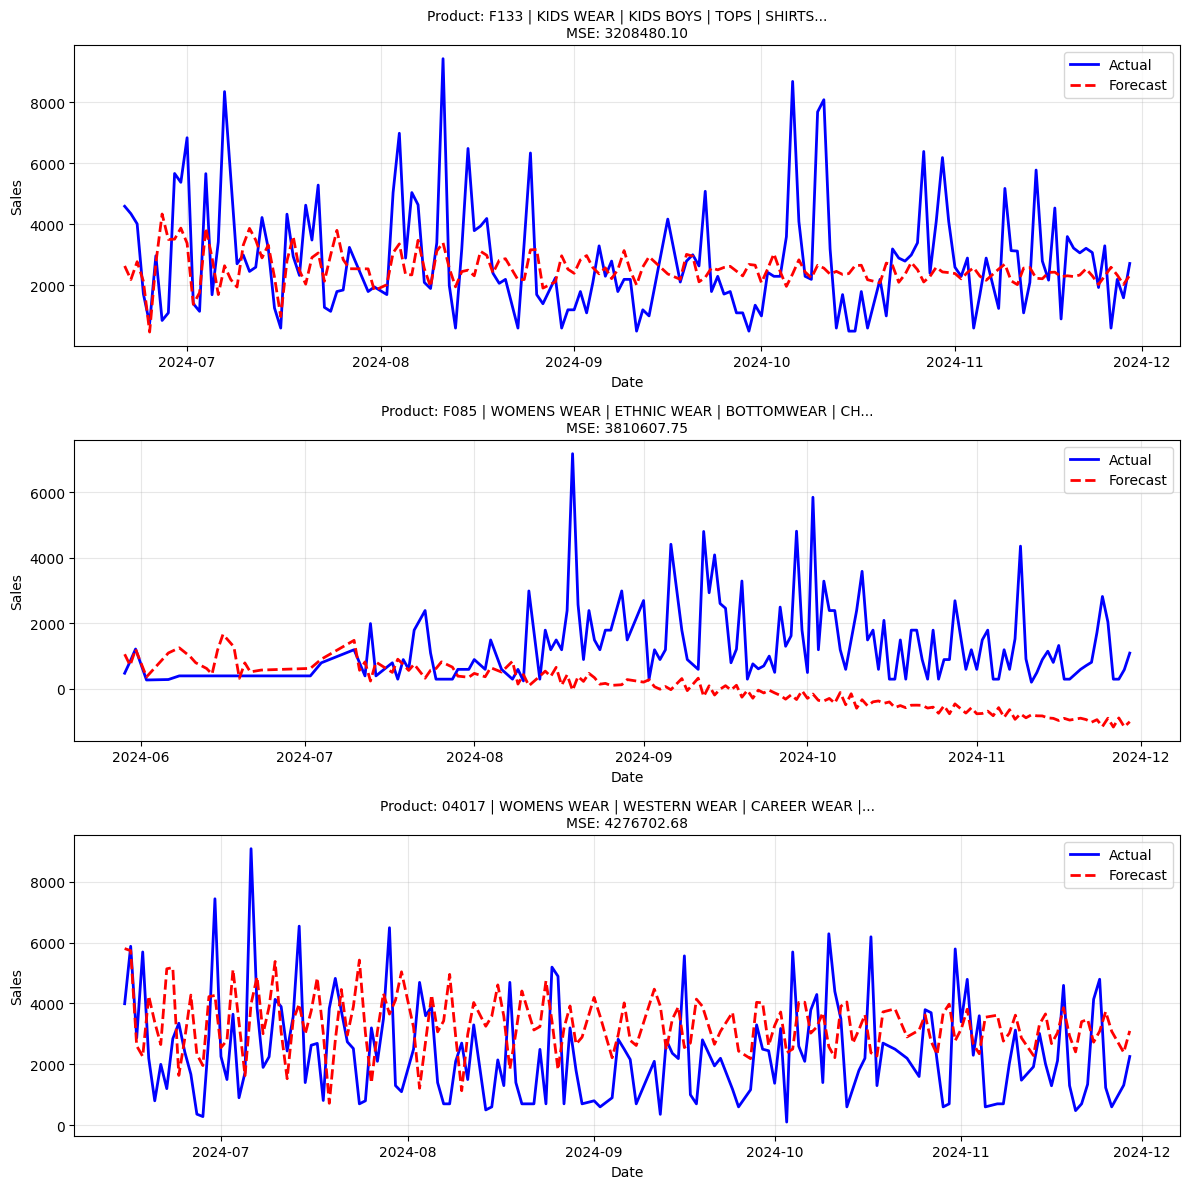


Generating 30-day future forecasts...
Future Forecast Summary (Next 30 days):
                                             product  avg_daily_forecast  \
0       F133 | KIDS WEAR | KIDS BOYS | TOPS | SHIRTS             2700.76   
1  F085 | WOMENS WEAR | ETHNIC WEAR | BOTTOMWEAR ...              807.22   
2  04017 | WOMENS WEAR | WESTERN WEAR | CAREER WE...             3571.46   
3  D526 | WOMENS WEAR | WESTERN WEAR | CASUAL WEA...             3062.77   
4  F085 | WOMENS WEAR | ETHNIC WEAR | DRAPEWEAR |...             2670.24   
5   F134 | KIDS WEAR | KIDS GIRLS | DRESSES | FROCKS             2105.64   
6    F138 | KIDS WEAR | YOUTH BOYS | BOTTOMS | PANTS             2570.93   
7  D526 | WOMENS WEAR | WESTERN WEAR | CASUAL WEA...             3743.23   
8  04063 | MENS CASUAL | CASUAL WEAR | BOTTOMS | ...             3986.98   
9  D526 | WOMENS WEAR | WESTERN WEAR | CASUAL WEA...             3360.17   

   total_forecast  
0        81022.72  
1        24216.66  
2       107143.65  
3   

In [117]:
# Run the complete pipeline
results = run_complete_arima_pipeline(df_sorted)

# Access different components
processed_data = results['processed_data']
forecasts = results['forecasts'] 
performance_results = results['results']
future_predictions = results['future_forecasts']

# Save results
performance_results.to_csv('arima_forecast_results.csv', index=False)


In [126]:
# Install and import TimeGPT
!pip install nixtlats

from nixtlats import TimeGPT
import pandas as pd
import numpy as np

# Initialize TimeGPT client
timegpt = TimeGPT(token='nixak-AI31YupjpWhin07kPGKOhvW5zj8IliWOlTSWLEInpOuKHNWNhtSETsXIFgyEiYT58g3Hk0hvMFhnJpdS')  # Get token from Nixtla


In [119]:
def prepare_data_for_timegpt(df_sorted, selected_products=None):
    """
    Convert retail sales data to TimeGPT format
    """
    # If no specific products selected, use top performers
    if selected_products is None:
        # Select top 20 products by total sales
        top_products = df_sorted.groupby('PRODUCT_KEY')['TOTAL_NET_SALES'].sum().nlargest(20)
        selected_products = top_products.index.tolist()
    
    # Filter for selected products
    filtered_df = df_sorted[df_sorted['PRODUCT_KEY'].isin(selected_products)]
    
    # Aggregate daily sales by product
    daily_sales = filtered_df.groupby(['BILLING_DATE', 'PRODUCT_KEY']).agg({
        'TOTAL_NET_SALES': 'sum',
        'TOTAL_BILLING_QTY': 'sum'
    }).reset_index()
    
    # Rename columns to TimeGPT format
    timegpt_data = daily_sales.rename(columns={
        'BILLING_DATE': 'ds',  # TimeGPT expects 'ds' for date
        'TOTAL_NET_SALES': 'y',  # TimeGPT expects 'y' for target variable
        'PRODUCT_KEY': 'unique_id'  # TimeGPT expects 'unique_id' for series identifier
    })
    
    # Ensure proper data types
    timegpt_data['ds'] = pd.to_datetime(timegpt_data['ds'])
    timegpt_data['y'] = pd.to_numeric(timegpt_data['y'])
    
    # Sort by unique_id and date
    timegpt_data = timegpt_data.sort_values(['unique_id', 'ds']).reset_index(drop=True)
    
    return timegpt_data[['unique_id', 'ds', 'y']]

# Prepare your data
timegpt_ready_data = prepare_data_for_timegpt(df_sorted)
print(f"Data prepared: {len(timegpt_ready_data)} rows, {timegpt_ready_data['unique_id'].nunique()} products")
print(timegpt_ready_data.head())


Data prepared: 15491 rows, 20 products
                                           unique_id         ds         y
0  04017 | MENS CASUAL | CASUAL WEAR | BOTTOMS | ... 2022-09-30   9483.60
1  04017 | MENS CASUAL | CASUAL WEAR | BOTTOMS | ... 2022-10-01  17706.78
2  04017 | MENS CASUAL | CASUAL WEAR | BOTTOMS | ... 2022-10-02  33964.76
3  04017 | MENS CASUAL | CASUAL WEAR | BOTTOMS | ... 2022-10-03  28445.99
4  04017 | MENS CASUAL | CASUAL WEAR | BOTTOMS | ... 2022-10-04  39100.07


In [122]:
def diagnose_frequency_issues(data):
    """
    Diagnose frequency issues in TimeGPT data
    """
    print("Diagnosing frequency issues...")
    freq_issues = {}
    
    for product_id, group in data.groupby('unique_id'):
        dates = group['ds'].sort_values()
        
        # Check for duplicates
        duplicates = dates.duplicated().sum()
        
        # Check for missing dates
        full_range = pd.date_range(start=dates.min(), end=dates.max(), freq='D')
        missing_dates = len(full_range) - len(dates)
        
        # Try to infer frequency
        inferred_freq = pd.infer_freq(dates)
        
        # Calculate date gaps
        date_diffs = dates.diff().dropna()
        irregular_gaps = (date_diffs != pd.Timedelta(days=1)).sum()
        
        freq_issues[product_id] = {
            'duplicates': duplicates,
            'missing_dates': missing_dates,
            'irregular_gaps': irregular_gaps,
            'inferred_freq': inferred_freq,
            'date_range_days': len(full_range),
            'actual_data_points': len(dates)
        }
    
    freq_df = pd.DataFrame.from_dict(freq_issues, orient='index')
    
    # Summary statistics
    print("Frequency Issues Summary:")
    print("=" * 50)
    print(f"Products with duplicates: {(freq_df['duplicates'] > 0).sum()}")
    print(f"Products with missing dates: {(freq_df['missing_dates'] > 0).sum()}")
    print(f"Products with irregular gaps: {(freq_df['irregular_gaps'] > 0).sum()}")
    print(f"Products with no inferred frequency: {freq_df['inferred_freq'].isnull().sum()}")
    
    # Show worst cases
    print(f"\nWorst cases (most missing dates):")
    print(freq_df.nlargest(5, 'missing_dates')[['missing_dates', 'actual_data_points', 'inferred_freq']])
    
    return freq_df

# Diagnose your data
frequency_issues = diagnose_frequency_issues(timegpt_ready_data)


Diagnosing frequency issues...
Frequency Issues Summary:
Products with duplicates: 0
Products with missing dates: 17
Products with irregular gaps: 17
Products with no inferred frequency: 17

Worst cases (most missing dates):
                                                    missing_dates  \
D699 | WOMENS WEAR | ETHNIC WEAR | TOPWEAR | KU...             82   
04042 | MENS WEAR | FORMAL WEAR | BOTTOMS | TRO...             52   
Q293 | MENS CASUAL | CASUAL WEAR | BOTTOMS | JEANS             33   
F086 | WOMENS WEAR | ETHNIC WEAR | SETS | Maxi ...             31   
04017 | MENS CASUAL | CASUAL WEAR | TOPS | SHIRTS              23   

                                                    actual_data_points  \
D699 | WOMENS WEAR | ETHNIC WEAR | TOPWEAR | KU...                 709   
04042 | MENS WEAR | FORMAL WEAR | BOTTOMS | TRO...                 740   
Q293 | MENS CASUAL | CASUAL WEAR | BOTTOMS | JEANS                 759   
F086 | WOMENS WEAR | ETHNIC WEAR | SETS | Maxi ...              

In [123]:
def fix_frequency_issues_verbose(data, fill_method='interpolate', min_data_points=30):
    """
    Fix frequency issues with detailed logging for your specific case
    """
    print("Fixing frequency issues for your retail data...")
    cleaned_data = []
    removed_products = []
    fix_summary = {}
    
    for product_id, group in data.groupby('unique_id'):
        print(f"\nProcessing: {product_id[:60]}...")
        
        # Sort by date and remove duplicates
        group = group.sort_values('ds').drop_duplicates(subset=['ds'], keep='first')
        original_points = len(group)
        
        # Skip products with insufficient data
        if len(group) < min_data_points:
            removed_products.append(product_id)
            continue
        
        # Create complete date range
        date_range = pd.date_range(
            start=group['ds'].min(),
            end=group['ds'].max(),
            freq='D'
        )
        
        expected_points = len(date_range)
        missing_points = expected_points - original_points
        
        print(f"  Original points: {original_points}")
        print(f"  Expected points: {expected_points}")
        print(f"  Missing points: {missing_points}")
        
        # Create complete time series
        complete_ts = pd.DataFrame({
            'ds': date_range,
            'unique_id': product_id
        })
        
        # Merge with actual data
        merged = pd.merge(complete_ts, group, on=['ds', 'unique_id'], how='left')
        
        # Handle missing values
        if fill_method == 'interpolate':
            # Linear interpolation for missing sales
            merged['y'] = merged['y'].interpolate(method='linear', limit_direction='both')
            # Fill any remaining NaNs with 0
            merged['y'] = merged['y'].fillna(0)
            
        elif fill_method == 'zero':
            merged['y'] = merged['y'].fillna(0)
            
        elif fill_method == 'smart_fill':
            # Use more sophisticated filling
            # Forward fill first, then backward fill, then zero
            merged['y'] = merged['y'].fillna(method='ffill').fillna(method='bfill').fillna(0)
        
        # Ensure no negative values
        merged['y'] = merged['y'].clip(lower=0)
        
        # Verify frequency can now be inferred
        test_freq = pd.infer_freq(merged['ds'])
        print(f"  Frequency after fix: {test_freq}")
        
        fix_summary[product_id] = {
            'original_points': original_points,
            'missing_filled': missing_points,
            'final_points': len(merged),
            'frequency_fixed': test_freq is not None
        }
        
        cleaned_data.append(merged)
    
    # Combine all cleaned data
    if cleaned_data:
        final_data = pd.concat(cleaned_data, ignore_index=True)
        
        # Summary statistics
        successful_fixes = sum(1 for v in fix_summary.values() if v['frequency_fixed'])
        total_missing_filled = sum(v['missing_filled'] for v in fix_summary.values())
        
        print(f"\n" + "="*60)
        print(f"FREQUENCY FIX SUMMARY:")
        print(f"="*60)
        print(f"Products processed: {len(fix_summary)}")
        print(f"Products with frequency fixed: {successful_fixes}")
        print(f"Products removed (insufficient data): {len(removed_products)}")
        print(f"Total missing dates filled: {total_missing_filled}")
        print(f"Final dataset: {len(final_data):,} rows, {final_data['unique_id'].nunique()} products")
        
        return final_data, fix_summary
    else:
        raise ValueError("No products have sufficient data for forecasting")

# Apply the comprehensive fix
timegpt_clean_data, fix_summary = fix_frequency_issues_verbose(
    timegpt_ready_data, 
    fill_method='interpolate',  # Use interpolation for smoother sales patterns
    min_data_points=30
)


Fixing frequency issues for your retail data...

Processing: 04017 | MENS CASUAL | CASUAL WEAR | BOTTOMS | JEANS...
  Original points: 788
  Expected points: 792
  Missing points: 4
  Frequency after fix: D

Processing: 04017 | MENS CASUAL | CASUAL WEAR | TOPS | SHIRTS...
  Original points: 769
  Expected points: 792
  Missing points: 23
  Frequency after fix: D

Processing: 04017 | MENS CASUAL | CASUAL WEAR | TOPS | T SHIRTS...
  Original points: 790
  Expected points: 792
  Missing points: 2
  Frequency after fix: D

Processing: 04017 | WOMENS WEAR | WESTERN WEAR | CASUAL WEAR | JEANS...
  Original points: 780
  Expected points: 792
  Missing points: 12
  Frequency after fix: D

Processing: 04042 | MENS WEAR | FORMAL WEAR | BOTTOMS | TROUSERS...
  Original points: 740
  Expected points: 792
  Missing points: 52
  Frequency after fix: D

Processing: 04042 | MENS WEAR | FORMAL WEAR | TOPS | SHIRTS...
  Original points: 779
  Expected points: 792
  Missing points: 13
  Frequency after f

In [124]:
def verify_complete_fix(data, fix_summary):
    """
    Comprehensive verification that frequency issues are resolved
    """
    print("\nVERIFYING FREQUENCY FIX:")
    print("="*50)
    
    success_count = 0
    total_products = data['unique_id'].nunique()
    
    # Test frequency inference for each product
    for product_id in data['unique_id'].unique():
        product_data = data[data['unique_id'] == product_id]
        dates = product_data['ds'].sort_values()
        
        # Check frequency inference
        inferred_freq = pd.infer_freq(dates)
        
        if inferred_freq == 'D':
            success_count += 1
        else:
            print(f"⚠️  Still problematic: {product_id[:50]}... (freq: {inferred_freq})")
    
    print(f"✅ Products with proper daily frequency: {success_count}/{total_products}")
    print(f"📊 Success rate: {(success_count/total_products)*100:.1f}%")
    
    # Show sample of fixed data
    sample_product = data['unique_id'].iloc[0]
    sample_data = data[data['unique_id'] == sample_product]
    
    print(f"\nSample fixed data for: {sample_product[:50]}...")
    print(f"Date range: {sample_data['ds'].min()} to {sample_data['ds'].max()}")
    print(f"Total points: {len(sample_data)}")
    print(f"Frequency: {pd.infer_freq(sample_data['ds'].sort_values())}")
    print(f"Sales range: {sample_data['y'].min():.2f} to {sample_data['y'].max():.2f}")
    
    return success_count == total_products

# Verify the fix
all_fixed = verify_complete_fix(timegpt_clean_data, fix_summary)



VERIFYING FREQUENCY FIX:
✅ Products with proper daily frequency: 20/20
📊 Success rate: 100.0%

Sample fixed data for: 04017 | MENS CASUAL | CASUAL WEAR | BOTTOMS | JEAN...
Date range: 2022-09-30 00:00:00 to 2024-11-29 00:00:00
Total points: 792
Frequency: D
Sales range: 0.00 to 70463.81


In [127]:
def run_timegpt_with_fixed_data(data):
    """
    Run TimeGPT forecasting with frequency-corrected data
    """
    print("Running TimeGPT with frequency-corrected data...")
    
    # Split data for validation
    test_df = data.groupby("unique_id").tail(7)
    train_df = data.groupby("unique_id").apply(
        lambda group: group.iloc[:-7]
    ).reset_index(drop=True)
    
    print(f"Train data: {len(train_df):,} rows")
    print(f"Test data: {len(test_df):,} rows")
    print(f"Products: {train_df['unique_id'].nunique()}")
    
    try:
        # Generate forecasts
        forecasts = timegpt.forecast(
            df=train_df,
            h=7,
            freq='D',  # Explicitly specify daily frequency
            level=[80, 90],
            time_col='ds',
            target_col='y',
            id_col='unique_id'
        )
        
        print("✅ TimeGPT forecasting completed successfully!")
        print(f"Forecasts generated: {len(forecasts):,} rows")
        print(f"Forecast columns: {list(forecasts.columns)}")
        
        # Show sample forecasts
        print("\nSample forecasts:")
        sample_product = forecasts['unique_id'].iloc[0]
        sample_forecasts = forecasts[forecasts['unique_id'] == sample_product]
        print(sample_forecasts[['ds', 'TimeGPT', 'TimeGPT-lo-90', 'TimeGPT-hi-90']].head())
        
        return forecasts, test_df
        
    except Exception as e:
        print(f"❌ TimeGPT error: {e}")
        return None, None

# Run TimeGPT with your fixed data
if all_fixed:
    forecasts, test_data = run_timegpt_with_fixed_data(timegpt_clean_data)
else:
    print("⚠️ Some products still have frequency issues. Trying with top 5 products only...")
    
    # Get top 5 products with confirmed daily frequency
    top_products = (timegpt_clean_data.groupby('unique_id')['y'].sum()
                   .nlargest(5).index.tolist())
    
    small_dataset = timegpt_clean_data[
        timegpt_clean_data['unique_id'].isin(top_products)
    ]
    
    forecasts, test_data = run_timegpt_with_fixed_data(small_dataset)


INFO:nixtlats.nixtla_client:Validating inputs...


INFO:nixtlats.nixtla_client:Preprocessing dataframes...


Running TimeGPT with frequency-corrected data...
Train data: 15,631 rows
Test data: 140 rows
Products: 20


INFO:nixtlats.nixtla_client:Restricting input...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...


✅ TimeGPT forecasting completed successfully!
Forecasts generated: 140 rows
Forecast columns: ['unique_id', 'ds', 'TimeGPT', 'TimeGPT-lo-90', 'TimeGPT-lo-80', 'TimeGPT-hi-80', 'TimeGPT-hi-90']

Sample forecasts:
           ds       TimeGPT  TimeGPT-lo-90  TimeGPT-hi-90
0  2024-11-23  12825.447266    7266.739697   18384.154834
1  2024-11-24  13679.998047     178.835767   27181.160327
2  2024-11-25  10985.768555    5376.115527   16595.421582
3  2024-11-26  10167.826172    2450.575874   17885.076470
4  2024-11-27  10015.228516    -728.580125   20759.037156


In [129]:
def fix_datetime_mismatch_and_evaluate(forecasts, test_data):
    """
    Fix datetime data type mismatch and evaluate TimeGPT performance
    """
    print("🔧 Fixing datetime mismatch...")
    
    # Check current data types
    print(f"Before conversion:")
    print(f"  test_data['ds'] dtype: {test_data['ds'].dtype}")
    print(f"  forecasts['ds'] dtype: {forecasts['ds'].dtype}")
    
    # Convert both 'ds' columns to datetime
    test_data['ds'] = pd.to_datetime(test_data['ds'], errors='coerce')
    forecasts['ds'] = pd.to_datetime(forecasts['ds'], errors='coerce')
    
    # Verify conversion
    print(f"After conversion:")
    print(f"  test_data['ds'] dtype: {test_data['ds'].dtype}")
    print(f"  forecasts['ds'] dtype: {forecasts['ds'].dtype}")
    
    # Check for any nulls after conversion
    test_nulls = test_data['ds'].isnull().sum()
    forecast_nulls = forecasts['ds'].isnull().sum()
    
    print(f"Nulls in test_data['ds']: {test_nulls}")
    print(f"Nulls in forecasts['ds']: {forecast_nulls}")
    
    if test_nulls > 0 or forecast_nulls > 0:
        print("⚠️ Warning: Some dates couldn't be converted!")
        
    # Now merge safely
    print("🔄 Merging data...")
    evaluation_data = pd.merge(
        test_data, 
        forecasts[['ds', 'unique_id', 'TimeGPT']], 
        on=['ds', 'unique_id'], 
        how='inner'
    )
    
    print(f"✅ Merge successful: {len(evaluation_data)} rows")
    
    return evaluation_data

# Apply the fix
evaluation_data = fix_datetime_mismatch_and_evaluate(forecasts, test_data)


🔧 Fixing datetime mismatch...
Before conversion:
  test_data['ds'] dtype: datetime64[ns]
  forecasts['ds'] dtype: object
After conversion:
  test_data['ds'] dtype: datetime64[ns]
  forecasts['ds'] dtype: datetime64[ns]
Nulls in test_data['ds']: 0
Nulls in forecasts['ds']: 0
🔄 Merging data...
✅ Merge successful: 140 rows


In [130]:
def evaluate_timegpt_results_fixed(forecasts, test_data):
    """
    Evaluate TimeGPT forecasting performance with datetime fix
    """
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    
    print("📊 Evaluating TimeGPT Performance...")
    
    # Fix datetime mismatch first
    print("🔧 Ensuring consistent datetime formats...")
    test_data_fixed = test_data.copy()
    forecasts_fixed = forecasts.copy()
    
    # Convert both to datetime
    test_data_fixed['ds'] = pd.to_datetime(test_data_fixed['ds'], errors='coerce')
    forecasts_fixed['ds'] = pd.to_datetime(forecasts_fixed['ds'], errors='coerce')
    
    # Check data consistency
    print(f"Test data date range: {test_data_fixed['ds'].min()} to {test_data_fixed['ds'].max()}")
    print(f"Forecast date range: {forecasts_fixed['ds'].min()} to {forecasts_fixed['ds'].max()}")
    print(f"Test data products: {test_data_fixed['unique_id'].nunique()}")
    print(f"Forecast products: {forecasts_fixed['unique_id'].nunique()}")
    
    # Merge forecasts with test data
    evaluation_data = pd.merge(
        test_data_fixed, 
        forecasts_fixed[['ds', 'unique_id', 'TimeGPT']], 
        on=['ds', 'unique_id'], 
        how='inner'
    )
    
    print(f"✅ Successfully merged {len(evaluation_data)} data points")
    
    if len(evaluation_data) == 0:
        print("❌ No matching data found for evaluation!")
        return None
    
    # Show sample of merged data
    print("\n📋 Sample merged data:")
    print(evaluation_data.head())
    
    # Calculate metrics by product
    product_metrics = []
    
    for product_id in evaluation_data['unique_id'].unique():
        product_eval = evaluation_data[evaluation_data['unique_id'] == product_id]
        
        if len(product_eval) > 0:
            mse = mean_squared_error(product_eval['y'], product_eval['TimeGPT'])
            mae = mean_absolute_error(product_eval['y'], product_eval['TimeGPT'])
            
            # Calculate percentage error
            mape = np.mean(np.abs((product_eval['y'] - product_eval['TimeGPT']) / product_eval['y'])) * 100
            
            product_metrics.append({
                'product': product_id,
                'mse': mse,
                'mae': mae,
                'mape': mape,
                'avg_actual': product_eval['y'].mean(),
                'avg_forecast': product_eval['TimeGPT'].mean(),
                'data_points': len(product_eval)
            })
    
    metrics_df = pd.DataFrame(product_metrics)
    
    if len(metrics_df) > 0:
        print(f"\n📈 Overall Performance:")
        print(f"   Average MSE: {metrics_df['mse'].mean():.2f}")
        print(f"   Average MAE: {metrics_df['mae'].mean():.2f}")
        print(f"   Average MAPE: {metrics_df['mape'].mean():.2f}%")
        print(f"   Products evaluated: {len(metrics_df)}")
        
        print(f"\n🏆 Top 5 Best Performing Products (lowest MSE):")
        top_products = metrics_df.nsmallest(5, 'mse')[['product', 'mse', 'mae', 'mape']].round(2)
        for idx, row in top_products.iterrows():
            print(f"   {row['product'][:50]}...")
            print(f"     MSE: {row['mse']}, MAE: {row['mae']}, MAPE: {row['mape']}%")
        
        print(f"\n📊 Performance Distribution:")
        print(f"   MSE range: {metrics_df['mse'].min():.2f} - {metrics_df['mse'].max():.2f}")
        print(f"   MAE range: {metrics_df['mae'].min():.2f} - {metrics_df['mae'].max():.2f}")
        print(f"   MAPE range: {metrics_df['mape'].min():.1f}% - {metrics_df['mape'].max():.1f}%")
        
        return metrics_df, evaluation_data
    else:
        print("❌ No valid metrics calculated!")
        return None, evaluation_data

# Run the fixed evaluation
if forecasts is not None and test_data is not None:
    performance_metrics, evaluation_data = evaluate_timegpt_results_fixed(forecasts, test_data)
else:
    print("❌ forecasts or test_data is None")


📊 Evaluating TimeGPT Performance...
🔧 Ensuring consistent datetime formats...
Test data date range: 2024-09-17 00:00:00 to 2024-11-29 00:00:00
Forecast date range: 2024-09-17 00:00:00 to 2024-11-29 00:00:00
Test data products: 20
Forecast products: 20
✅ Successfully merged 140 data points

📋 Sample merged data:
          ds                                          unique_id         y  \
0 2024-11-23  04017 | MENS CASUAL | CASUAL WEAR | BOTTOMS | ...  16590.96   
1 2024-11-24  04017 | MENS CASUAL | CASUAL WEAR | BOTTOMS | ...  17246.07   
2 2024-11-25  04017 | MENS CASUAL | CASUAL WEAR | BOTTOMS | ...  11999.13   
3 2024-11-26  04017 | MENS CASUAL | CASUAL WEAR | BOTTOMS | ...   3297.00   
4 2024-11-27  04017 | MENS CASUAL | CASUAL WEAR | BOTTOMS | ...   3696.00   

        TimeGPT  
0  12825.447266  
1  13679.998047  
2  10985.768555  
3  10167.826172  
4  10015.228516  

📈 Overall Performance:
   Average MSE: 72738255.88
   Average MAE: 5271.33
   Average MAPE: 79.77%
   Products eval

In [131]:
def evaluate_timegpt_performance(evaluation_data):
    """
    Comprehensive evaluation of TimeGPT forecasting performance
    """
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import numpy as np
    
    print("📊 TIMEGPT FORECASTING PERFORMANCE EVALUATION")
    print("=" * 60)
    
    # Overall performance metrics
    overall_mse = mean_squared_error(evaluation_data['y'], evaluation_data['TimeGPT'])
    overall_mae = mean_absolute_error(evaluation_data['y'], evaluation_data['TimeGPT'])
    overall_mape = np.mean(np.abs((evaluation_data['y'] - evaluation_data['TimeGPT']) / evaluation_data['y'])) * 100
    
    # Calculate R-squared
    ss_res = np.sum((evaluation_data['y'] - evaluation_data['TimeGPT']) ** 2)
    ss_tot = np.sum((evaluation_data['y'] - np.mean(evaluation_data['y'])) ** 2)
    r2_score = 1 - (ss_res / ss_tot)
    
    print(f"🎯 OVERALL PERFORMANCE:")
    print(f"   Mean Squared Error (MSE): {overall_mse:.2f}")
    print(f"   Mean Absolute Error (MAE): {overall_mae:.2f}")
    print(f"   Mean Absolute Percentage Error (MAPE): {overall_mape:.2f}%")
    print(f"   R-squared Score: {r2_score:.3f}")
    print(f"   Total Data Points: {len(evaluation_data)}")
    
    # Per-product performance
    product_metrics = []
    
    for product_id in evaluation_data['unique_id'].unique():
        product_eval = evaluation_data[evaluation_data['unique_id'] == product_id]
        
        if len(product_eval) > 0:
            mse_p = mean_squared_error(product_eval['y'], product_eval['TimeGPT'])
            mae_p = mean_absolute_error(product_eval['y'], product_eval['TimeGPT'])
            mape_p = np.mean(np.abs((product_eval['y'] - product_eval['TimeGPT']) / product_eval['y'])) * 100
            
            # Additional metrics
            avg_actual = product_eval['y'].mean()
            avg_forecast = product_eval['TimeGPT'].mean()
            forecast_bias = avg_forecast - avg_actual
            bias_percentage = (forecast_bias / avg_actual) * 100 if avg_actual != 0 else 0
            
            product_metrics.append({
                'product': product_id,
                'mse': mse_p,
                'mae': mae_p,
                'mape': mape_p,
                'avg_actual': avg_actual,
                'avg_forecast': avg_forecast,
                'bias': forecast_bias,
                'bias_percent': bias_percentage,
                'data_points': len(product_eval)
            })
    
    metrics_df = pd.DataFrame(product_metrics)
    
    print(f"\n📈 PER-PRODUCT PERFORMANCE:")
    print(f"   Products Evaluated: {len(metrics_df)}")
    print(f"   Average MSE: {metrics_df['mse'].mean():.2f}")
    print(f"   Average MAE: {metrics_df['mae'].mean():.2f}")
    print(f"   Average MAPE: {metrics_df['mape'].mean():.2f}%")
    
    # Performance categories
    excellent = metrics_df[metrics_df['mape'] < 10]
    good = metrics_df[(metrics_df['mape'] >= 10) & (metrics_df['mape'] < 20)]
    fair = metrics_df[(metrics_df['mape'] >= 20) & (metrics_df['mape'] < 30)]
    poor = metrics_df[metrics_df['mape'] >= 30]
    
    print(f"\n🏆 PERFORMANCE CATEGORIES:")
    print(f"   Excellent (MAPE < 10%): {len(excellent)} products")
    print(f"   Good (MAPE 10-20%): {len(good)} products")
    print(f"   Fair (MAPE 20-30%): {len(fair)} products")
    print(f"   Poor (MAPE > 30%): {len(poor)} products")
    
    # Top performers
    print(f"\n🥇 TOP 5 BEST PERFORMING PRODUCTS:")
    top_5 = metrics_df.nsmallest(5, 'mape')[['product', 'mse', 'mae', 'mape', 'bias_percent']]
    for idx, row in top_5.iterrows():
        product_name = row['product'][:50] + "..." if len(row['product']) > 50 else row['product']
        print(f"   {idx+1}. {product_name}")
        print(f"      MSE: {row['mse']:.2f}, MAE: {row['mae']:.2f}, MAPE: {row['mape']:.1f}%, Bias: {row['bias_percent']:.1f}%")
    
    return metrics_df, {
        'overall_mse': overall_mse,
        'overall_mae': overall_mae,
        'overall_mape': overall_mape,
        'r2_score': r2_score,
        'total_points': len(evaluation_data)
    }

# Run the comprehensive evaluation
performance_metrics, overall_stats = evaluate_timegpt_performance(evaluation_data)


📊 TIMEGPT FORECASTING PERFORMANCE EVALUATION
🎯 OVERALL PERFORMANCE:
   Mean Squared Error (MSE): 72738255.88
   Mean Absolute Error (MAE): 5271.33
   Mean Absolute Percentage Error (MAPE): 79.77%
   R-squared Score: 0.807
   Total Data Points: 140

📈 PER-PRODUCT PERFORMANCE:
   Products Evaluated: 20
   Average MSE: 72738255.88
   Average MAE: 5271.33
   Average MAPE: 79.77%

🏆 PERFORMANCE CATEGORIES:
   Excellent (MAPE < 10%): 1 products
   Good (MAPE 10-20%): 0 products
   Fair (MAPE 20-30%): 2 products
   Poor (MAPE > 30%): 17 products

🥇 TOP 5 BEST PERFORMING PRODUCTS:
   15. D699 | WOMENS WEAR | ETHNIC WEAR | TOPWEAR | KURTA...
      MSE: 1117.68, MAE: 31.16, MAPE: 9.2%, Bias: 9.0%
   2. 04017 | MENS CASUAL | CASUAL WEAR | TOPS | SHIRTS
      MSE: 5699949.84, MAE: 1881.65, MAPE: 26.2%, Bias: -27.9%
   3. 04017 | MENS CASUAL | CASUAL WEAR | TOPS | T SHIRT...
      MSE: 5699489.69, MAE: 1887.50, MAPE: 28.7%, Bias: 4.2%
   20. Q293 | MENS CASUAL | CASUAL WEAR | BOTTOMS | JEANS
      

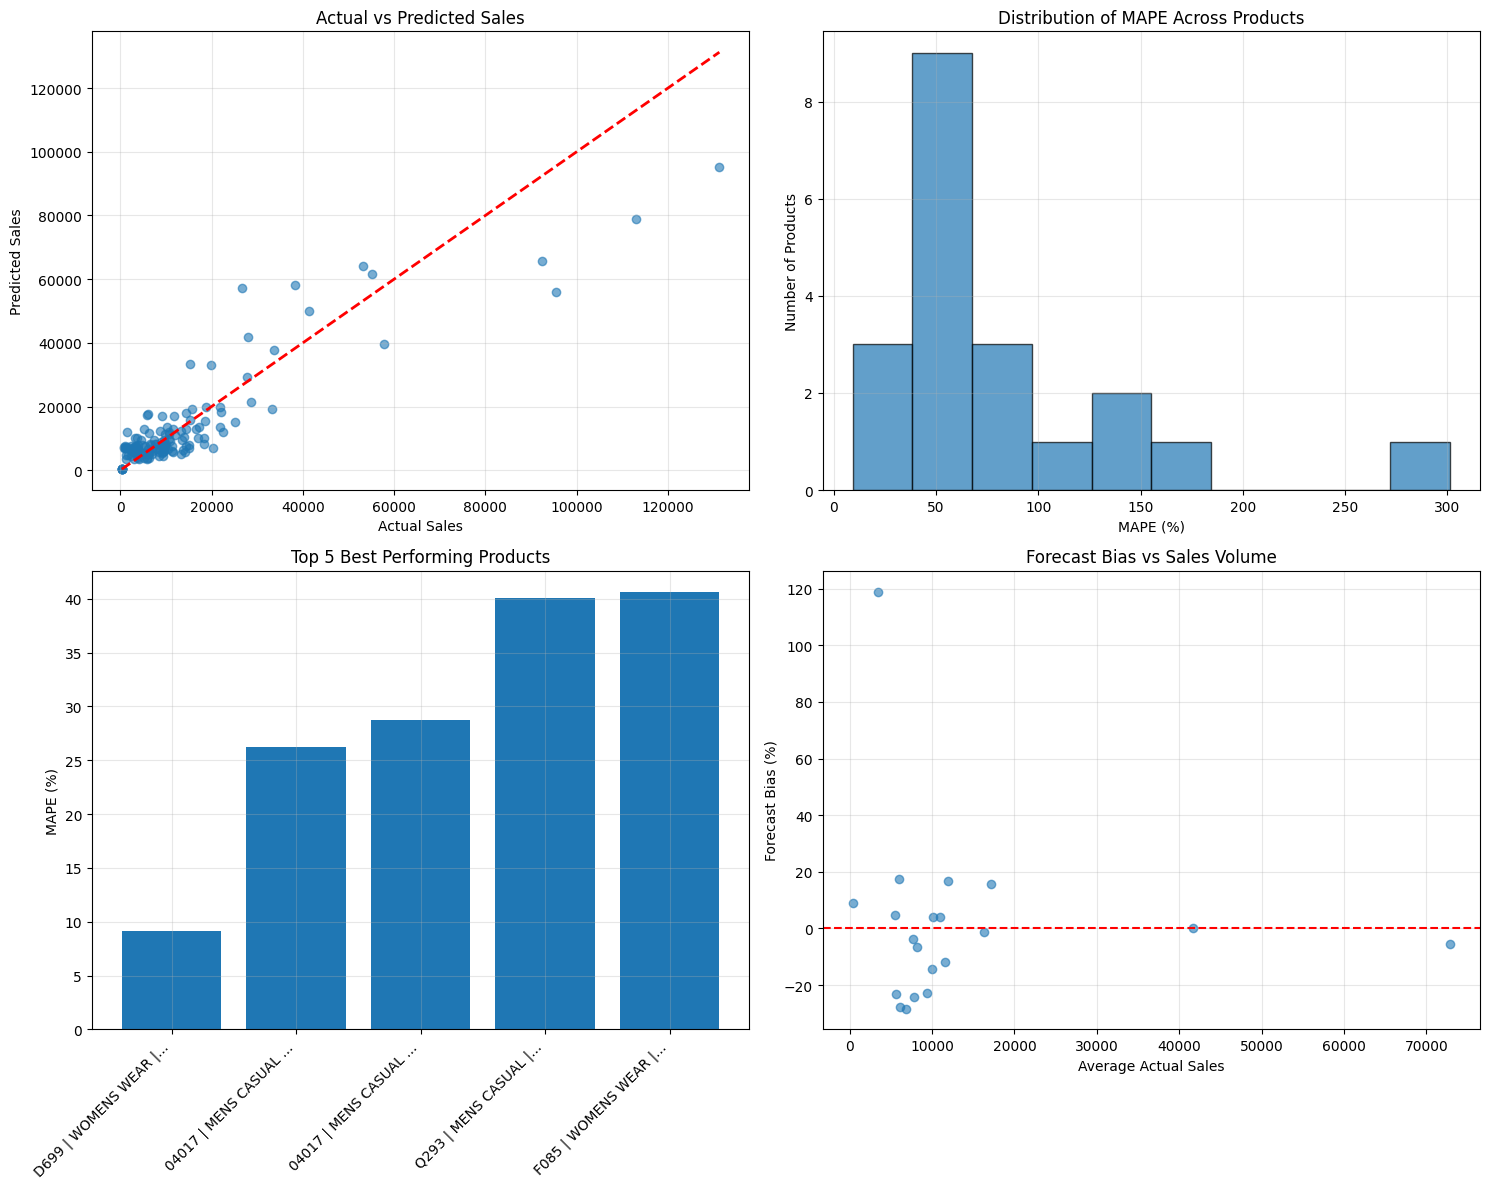

In [132]:
def visualize_timegpt_performance(evaluation_data, performance_metrics):
    """
    Create visualizations of TimeGPT performance
    """
    import matplotlib.pyplot as plt
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Actual vs Predicted scatter plot
    axes[0,0].scatter(evaluation_data['y'], evaluation_data['TimeGPT'], alpha=0.6)
    axes[0,0].plot([evaluation_data['y'].min(), evaluation_data['y'].max()], 
                   [evaluation_data['y'].min(), evaluation_data['y'].max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual Sales')
    axes[0,0].set_ylabel('Predicted Sales')
    axes[0,0].set_title('Actual vs Predicted Sales')
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. MAPE distribution
    axes[0,1].hist(performance_metrics['mape'], bins=10, edgecolor='black', alpha=0.7)
    axes[0,1].set_xlabel('MAPE (%)')
    axes[0,1].set_ylabel('Number of Products')
    axes[0,1].set_title('Distribution of MAPE Across Products')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Top 5 products performance
    top_5 = performance_metrics.nsmallest(5, 'mape')
    product_names = [p[:20] + '...' for p in top_5['product']]
    axes[1,0].bar(range(len(top_5)), top_5['mape'])
    axes[1,0].set_xticks(range(len(top_5)))
    axes[1,0].set_xticklabels(product_names, rotation=45, ha='right')
    axes[1,0].set_ylabel('MAPE (%)')
    axes[1,0].set_title('Top 5 Best Performing Products')
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Forecast bias
    axes[1,1].scatter(performance_metrics['avg_actual'], performance_metrics['bias_percent'], alpha=0.6)
    axes[1,1].axhline(y=0, color='r', linestyle='--')
    axes[1,1].set_xlabel('Average Actual Sales')
    axes[1,1].set_ylabel('Forecast Bias (%)')
    axes[1,1].set_title('Forecast Bias vs Sales Volume')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Create visualizations
visualization = visualize_timegpt_performance(evaluation_data, performance_metrics)


📊 Creating plots for 5 products...
Plotting: 04017 | MENS CASUAL | CASUAL WEAR | BOTTOMS | JEAN...
Plotting: 04017 | MENS CASUAL | CASUAL WEAR | TOPS | SHIRTS...
Plotting: F639 | WOMENS WEAR | ETHNIC WEAR | TOPWEAR | KURTA...
Plotting: F086 | WOMENS WEAR | ETHNIC WEAR | SETS | Maxi Dre...
Plotting: F085 | WOMENS WEAR | ETHNIC WEAR | TOPWEAR | KURTA...


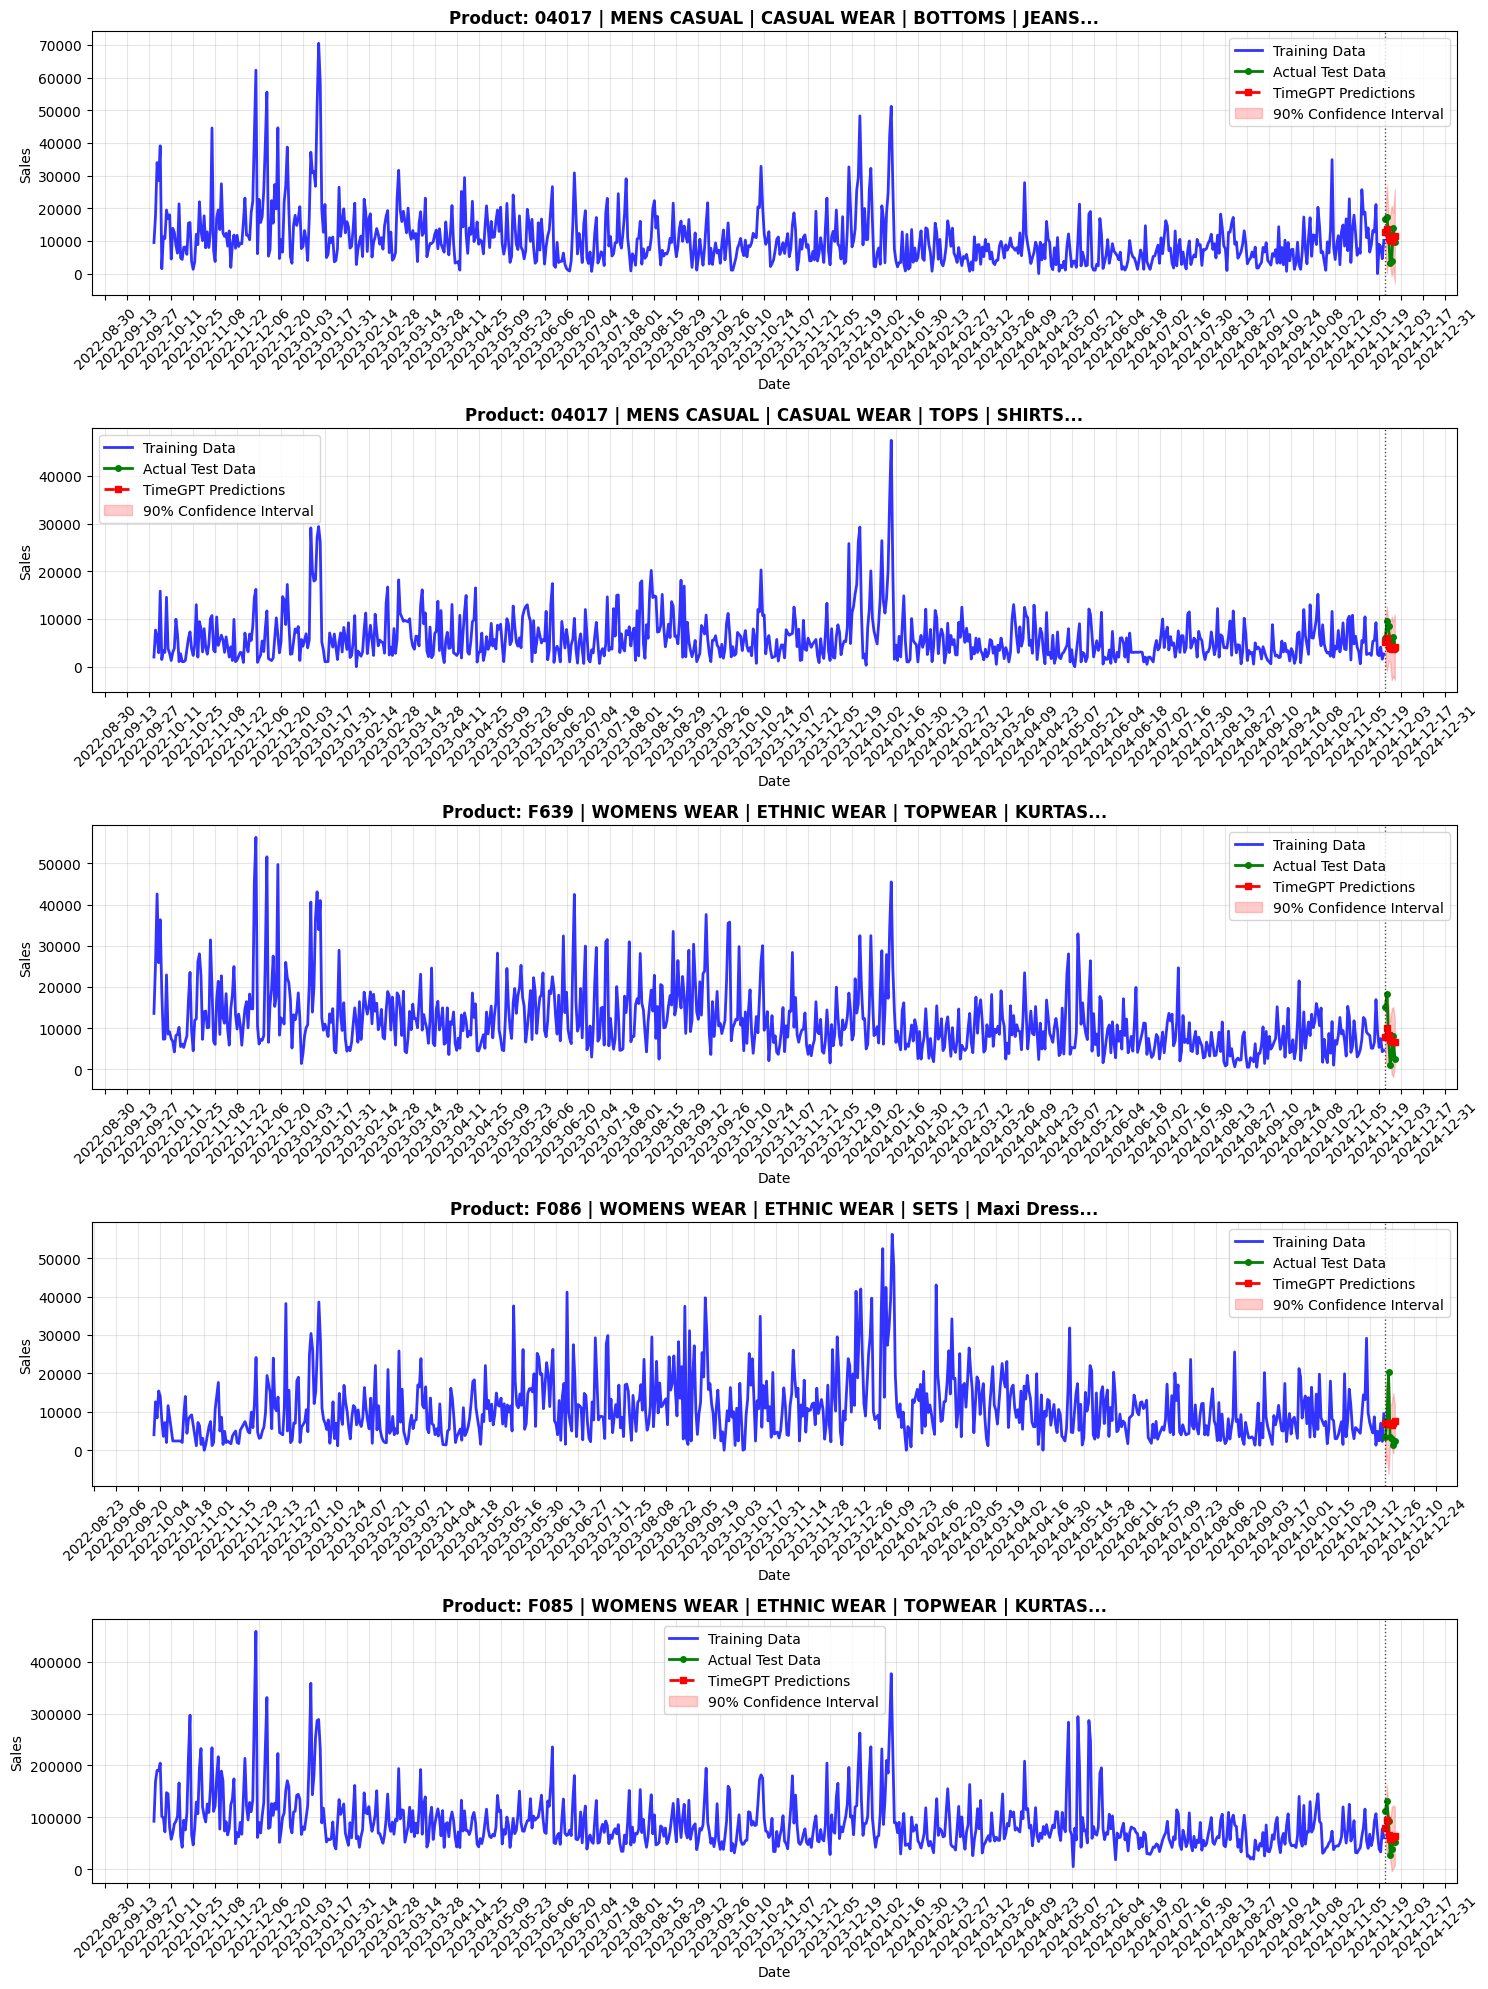

In [134]:
def plot_training_vs_prediction(final_clean_data, evaluation_data, forecasts, products_to_plot=5):
    """
    Create comprehensive plots showing training data, actual test, and predictions
    """
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    from datetime import datetime
    
    # Get unique products and select top ones for plotting
    available_products = evaluation_data['unique_id'].unique()
    
    # Select products with most data or best performance
    if len(available_products) > products_to_plot:
        # Get products with most evaluation data points
        product_counts = evaluation_data['unique_id'].value_counts()
        selected_products = product_counts.head(products_to_plot).index.tolist()
    else:
        selected_products = available_products.tolist()
    
    print(f"📊 Creating plots for {len(selected_products)} products...")
    
    # Create subplots
    fig, axes = plt.subplots(len(selected_products), 1, figsize=(15, 4*len(selected_products)))
    if len(selected_products) == 1:
        axes = [axes]
    
    for idx, product_id in enumerate(selected_products):
        print(f"Plotting: {product_id[:50]}...")
        
        # Get training data for this product
        product_train = final_clean_data[final_clean_data['unique_id'] == product_id].copy()
        product_train = product_train.sort_values('ds')
        
        # Get test data (actual values)
        product_test_actual = evaluation_data[evaluation_data['unique_id'] == product_id].copy()
        product_test_actual = product_test_actual.sort_values('ds')
        
        # Get predictions for this product
        product_predictions = forecasts[forecasts['unique_id'] == product_id].copy()
        product_predictions = product_predictions.sort_values('ds')
        
        # Find the split point (where training ends and test begins)
        if len(product_test_actual) > 0:
            test_start_date = product_test_actual['ds'].min()
            train_data = product_train[product_train['ds'] < test_start_date]
        else:
            train_data = product_train
        
        # Plot training data
        axes[idx].plot(train_data['ds'], train_data['y'], 
                      color='blue', linewidth=2, label='Training Data', alpha=0.8)
        
        # Plot actual test data
        if len(product_test_actual) > 0:
            axes[idx].plot(product_test_actual['ds'], product_test_actual['y'], 
                          color='green', linewidth=2, label='Actual Test Data', 
                          marker='o', markersize=4)
        
        # Plot predictions
        if len(product_predictions) > 0:
            axes[idx].plot(product_predictions['ds'], product_predictions['TimeGPT'], 
                          color='red', linewidth=2, label='TimeGPT Predictions', 
                          marker='s', markersize=4, linestyle='--')
            
            # Add confidence intervals if available
            if 'TimeGPT-lo-90' in product_predictions.columns and 'TimeGPT-hi-90' in product_predictions.columns:
                axes[idx].fill_between(product_predictions['ds'], 
                                     product_predictions['TimeGPT-lo-90'], 
                                     product_predictions['TimeGPT-hi-90'], 
                                     color='red', alpha=0.2, label='90% Confidence Interval')
        
        # Formatting
        axes[idx].set_title(f'Product: {product_id[:60]}...', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Date')
        axes[idx].set_ylabel('Sales')
        axes[idx].legend(loc='best')
        axes[idx].grid(True, alpha=0.3)
        
        # Format x-axis dates
        axes[idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        axes[idx].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
        plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=45)
        
        # Add vertical line to separate training and test
        if len(product_test_actual) > 0:
            axes[idx].axvline(x=test_start_date, color='black', linestyle=':', 
                            linewidth=1, alpha=0.7, label='Train/Test Split')
    
    plt.tight_layout()
    plt.show()
    
    return fig

final_clean_data = timegpt_clean_data
# Create the comprehensive plot
plot_figure = plot_training_vs_prediction(final_clean_data, evaluation_data, forecasts, products_to_plot=5)


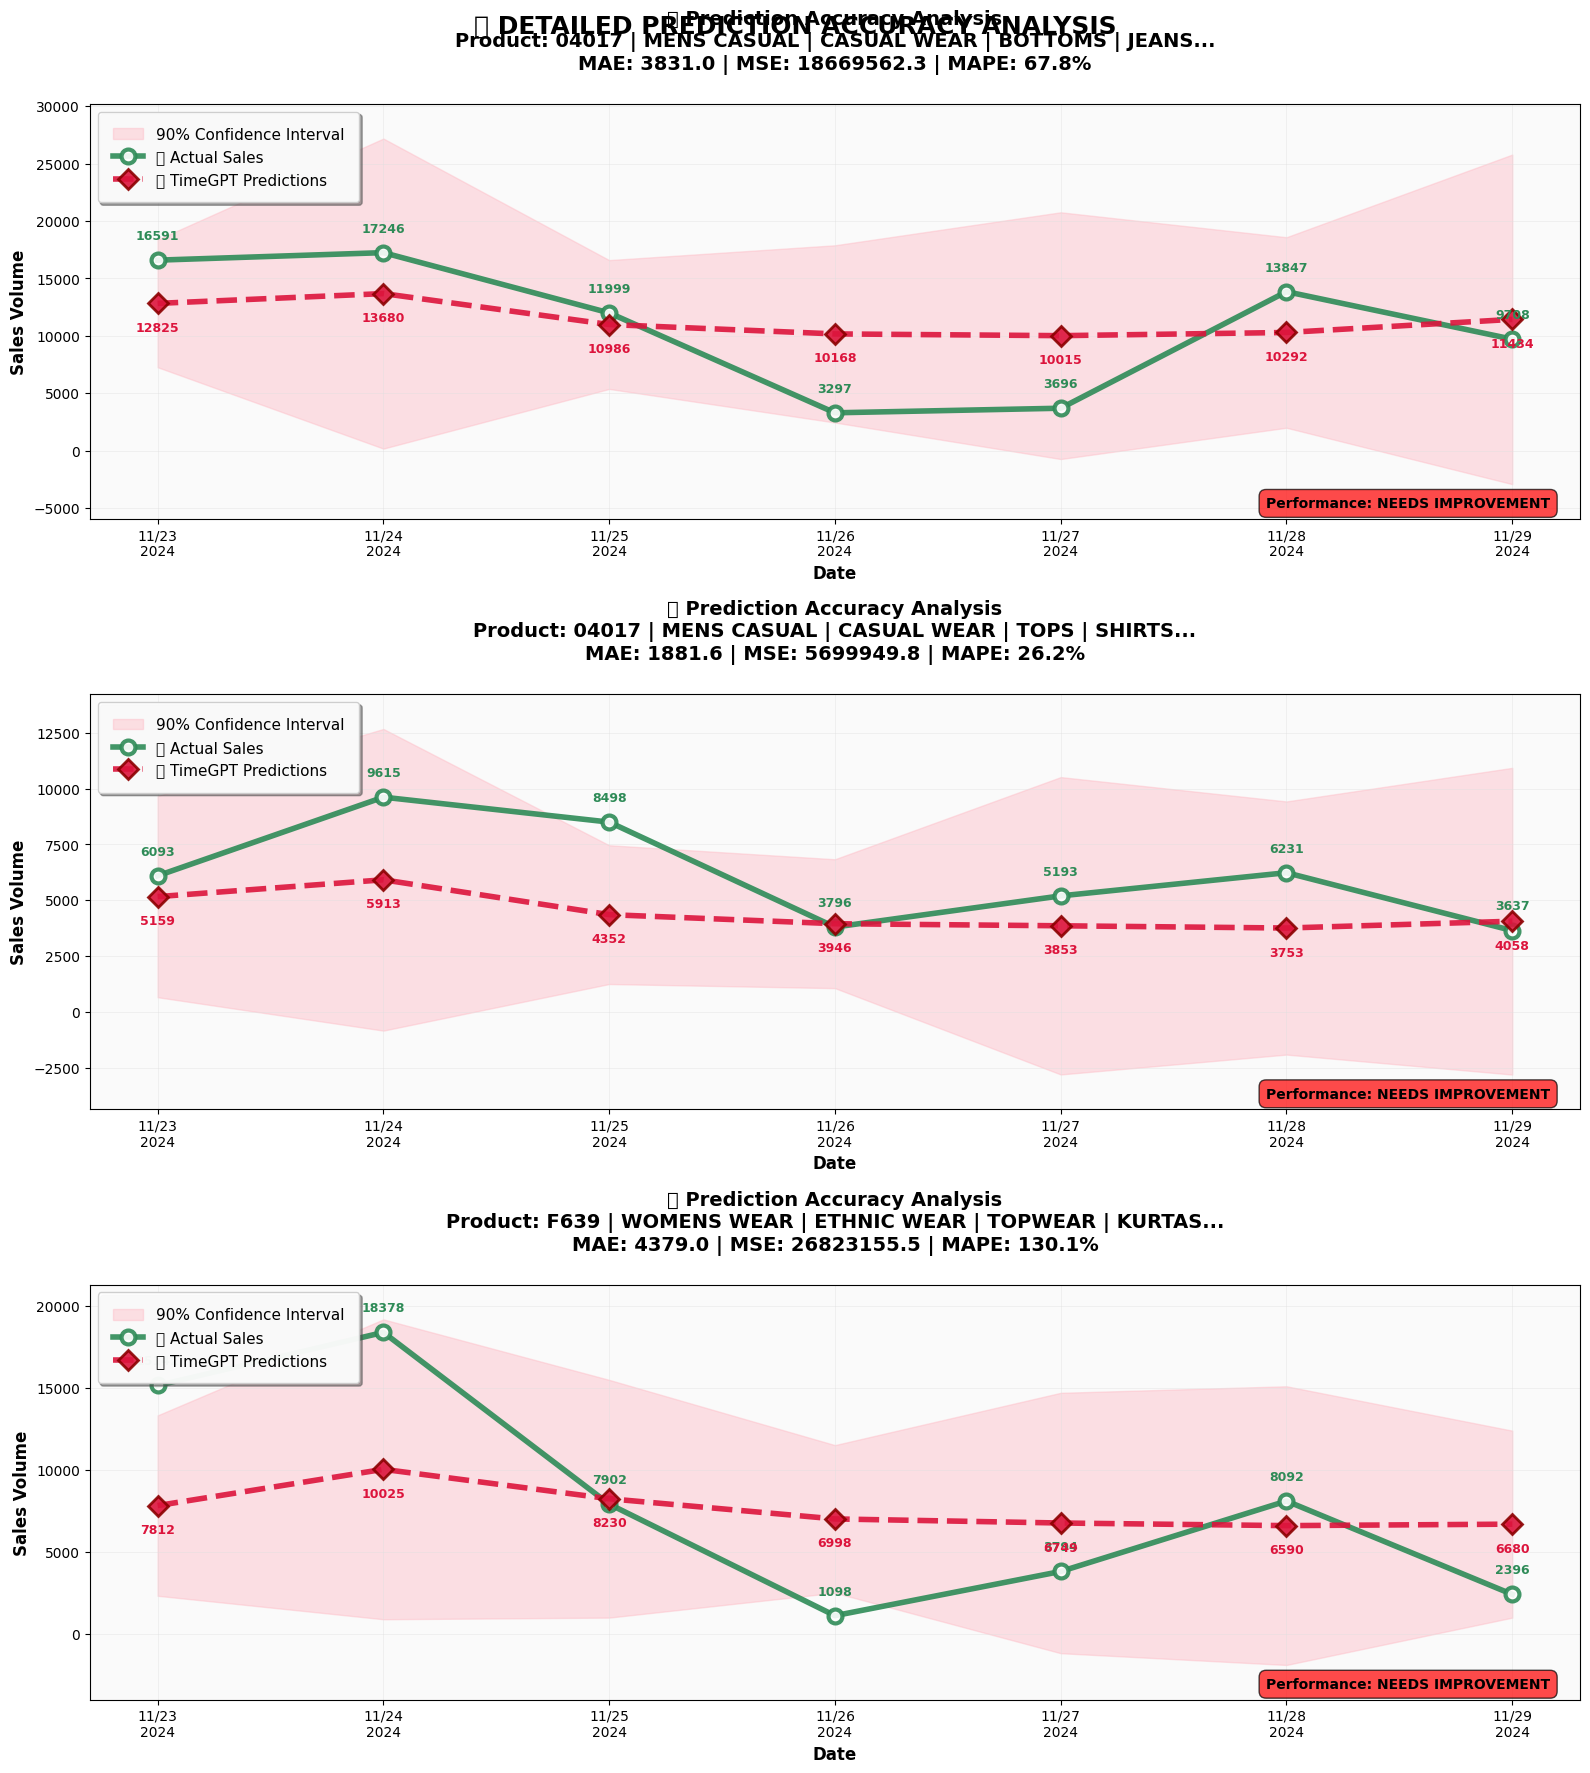

In [135]:
def plot_enhanced_pred_vs_actual(evaluation_data, forecasts, products_to_plot=3):
    """
    Create enhanced zoomed-in plots focusing on prediction accuracy
    """
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    import numpy as np
    
    # Select products with most evaluation data
    product_counts = evaluation_data['unique_id'].value_counts()
    selected_products = product_counts.head(products_to_plot).index.tolist()
    
    # Create larger figure with better spacing
    fig, axes = plt.subplots(len(selected_products), 1, figsize=(16, 6*len(selected_products)))
    if len(selected_products) == 1:
        axes = [axes]
    
    colors = {
        'actual': '#2E8B57',      # Sea Green
        'predicted': '#DC143C',   # Crimson
        'confidence': '#FFB6C1',  # Light Pink
        'grid': '#E0E0E0'
    }
    
    for idx, product_id in enumerate(selected_products):
        ax = axes[idx]
        
        # Get data for this product
        test_actual = evaluation_data[evaluation_data['unique_id'] == product_id].sort_values('ds')
        pred = forecasts[forecasts['unique_id'] == product_id].sort_values('ds')
        
        # Calculate performance metrics
        if len(test_actual) > 0 and len(pred) > 0:
            mae = mean_absolute_error(test_actual['y'], pred['TimeGPT'])
            mse = mean_squared_error(test_actual['y'], pred['TimeGPT'])
            mape = np.mean(np.abs((test_actual['y'] - pred['TimeGPT']) / test_actual['y'])) * 100
        
        # Plot confidence interval first (so it's behind other lines)
        if 'TimeGPT-lo-90' in pred.columns and 'TimeGPT-hi-90' in pred.columns:
            ax.fill_between(pred['ds'], pred['TimeGPT-lo-90'], pred['TimeGPT-hi-90'], 
                           color=colors['confidence'], alpha=0.4, label='90% Confidence Interval')
        
        # Plot actual test data with prominent markers
        ax.plot(test_actual['ds'], test_actual['y'], 
                marker='o', color=colors['actual'], linewidth=4, markersize=10, 
                markerfacecolor='white', markeredgewidth=3, markeredgecolor=colors['actual'],
                label='📊 Actual Sales', linestyle='-', alpha=0.9)
        
        # Plot predictions with distinct markers
        ax.plot(pred['ds'], pred['TimeGPT'], 
                marker='D', color=colors['predicted'], linewidth=4, markersize=10,
                markerfacecolor=colors['predicted'], markeredgewidth=2, markeredgecolor='darkred',
                label='🤖 TimeGPT Predictions', linestyle='--', alpha=0.9)
        
        # Add value labels on data points
        for i, row in test_actual.iterrows():
            ax.annotate(f'{row["y"]:.0f}', (row['ds'], row['y']), 
                       textcoords="offset points", xytext=(0,15), ha='center',
                       fontsize=9, fontweight='bold', color=colors['actual'])
        
        for i, row in pred.iterrows():
            ax.annotate(f'{row["TimeGPT"]:.0f}', (row['ds'], row['TimeGPT']), 
                       textcoords="offset points", xytext=(0,-20), ha='center',
                       fontsize=9, fontweight='bold', color=colors['predicted'])
        
        # Enhanced title with metrics
        title = f"🎯 Prediction Accuracy Analysis\n"
        title += f"Product: {product_id[:60]}...\n"
        title += f"MAE: {mae:.1f} | MSE: {mse:.1f} | MAPE: {mape:.1f}%"
        
        ax.set_title(title, fontsize=14, fontweight='bold', pad=25)
        ax.set_xlabel('Date', fontsize=12, fontweight='bold')
        ax.set_ylabel('Sales Volume', fontsize=12, fontweight='bold')
        
        # Enhanced legend
        ax.legend(loc='upper left', fontsize=11, framealpha=0.95, 
                 fancybox=True, shadow=True, borderpad=1)
        
        # Grid styling
        ax.grid(True, alpha=0.6, linestyle='-', linewidth=0.5, color=colors['grid'])
        ax.set_facecolor('#FAFAFA')
        
        # Zoom to test period with padding
        if len(test_actual) > 0:
            date_range = test_actual['ds'].max() - test_actual['ds'].min()
            padding = date_range * 0.05  # 5% padding
            ax.set_xlim(test_actual['ds'].min() - padding, 
                       test_actual['ds'].max() + padding)
        
        # Y-axis limits with padding
        all_values = list(test_actual['y']) + list(pred['TimeGPT'])
        if 'TimeGPT-lo-90' in pred.columns:
            all_values.extend(list(pred['TimeGPT-lo-90']))
            all_values.extend(list(pred['TimeGPT-hi-90']))
        
        y_min, y_max = min(all_values), max(all_values)
        y_range = y_max - y_min
        ax.set_ylim(y_min - y_range*0.1, y_max + y_range*0.1)
        
        # Enhanced date formatting
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d\n%Y'))
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, ha='center')
        
        # Add performance indicator
        performance_color = 'green' if mape < 15 else 'orange' if mape < 25 else 'red'
        performance_text = 'EXCELLENT' if mape < 15 else 'GOOD' if mape < 25 else 'NEEDS IMPROVEMENT'
        
        ax.text(0.98, 0.02, f"Performance: {performance_text}", transform=ax.transAxes,
               fontsize=10, fontweight='bold', ha='right', va='bottom',
               bbox=dict(boxstyle='round,pad=0.5', facecolor=performance_color, alpha=0.7, edgecolor='black'))
    
    plt.suptitle('🔍 DETAILED PREDICTION ACCURACY ANALYSIS', 
                fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    return fig

# Run the enhanced visualization
enhanced_plot = plot_enhanced_pred_vs_actual(evaluation_data, forecasts, products_to_plot=3)


🚀 STARTING COMPLETE TIMEGPT PIPELINE

📋 STEP 1: DATA CLEANING AND PREPARATION
   • Handling null values...
   • Selecting top performing products...


INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...


   • Aggregating daily sales...
   ✅ Data prepared: 7793 rows, 10 products

🔧 STEP 2: FIXING FREQUENCY ISSUES
   • Diagnosing frequency issues...
   ✅ Fixed frequency for 10 products
   📊 Final dataset: 7918 rows

✂️ STEP 3: TRAIN-TEST SPLIT
   • Splitting data with 14 test days...
   ✅ Train: 7778 rows, Test: 140 rows

🤖 STEP 4: TIMEGPT FORECASTING
   • Running TimeGPT forecast for 7 periods...


INFO:nixtlats.nixtla_client:Restricting input...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...


   ✅ Forecasts generated: 70 rows

📊 STEP 5: MODEL EVALUATION
   • Calculating performance metrics...
   📊 Data quality check:
      • Zero values in actual data: 1
      • Near-zero values: 1
   ✅ Evaluation complete: 10 products evaluated
   📊 Average MAE: 5055.04
   📊 Average RMSE: 6131.95
   📊 Average sMAPE: 32.00% (recommended)
   📊 Average MAPE: 41.50% (calculated from 10/10 products)
   ⚠️  Products with zero values: 1

📈 STEP 6: CREATING VISUALIZATIONS
   • Creating TimeGPT visualization...
   ✅ TimeGPT native plot created

🔮 STEP 7: FUTURE FORECASTING
   • Generating 14-day future forecasts...


INFO:nixtlats.nixtla_client:Restricting input...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...


   ✅ Future forecasts generated
   📊 Top 5 products by projected sales:
                                                    avg_daily  total_forecast
unique_id                                                                    
F085 | WOMENS WEAR | ETHNIC WEAR | TOPWEAR | KU...   69930.55       979027.64
04042 | MENS WEAR | SMART CASUALS | TOPS | SHIRTS    37322.55       522515.71
04063 | MENS CASUAL | ACTIVE WEAR | BOTTOMS | T...   19227.43       269184.03
04042 | MENS WEAR | SMART CASUALS | BOTTOMS | T...   14836.01       207704.10
04063 | MENS CASUAL | ACTIVE WEAR | TOPS | T SH...   14433.18       202064.58

🎉 PIPELINE COMPLETED SUCCESSFULLY!
📋 Results Summary:
   • Products processed: 10
   • Training data points: 7778
   • Test data points: 140
   • Average MAPE: 41.50%


Model Performance: 87.1% MAPE
